In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from cycler import cycler

plt.rcParams['font.sans-serif'] = ['WenQuanYi Micro Hei'] 
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.dpi'] = 300

default_cycler = cycler(marker=['o', '*', 'X', 'P', '>', 'D'])
color_dict = {
    '100': 'b',
    '200': 'r',
    '300': 'yellow',
    '400': 'c',
    '500': 'm'
}
plt.rc('axes', prop_cycle=default_cycler)


In [2]:
def p2f(x):
    return float(x.strip('%'))/100

In [3]:
df = pd.read_csv('./sim_app.ratio.csv', sep=',', converters={'c_packet_rate': p2f})
df['mode'] = 'append'
# 因為把 append 計數位置寫錯，所以需要全部減掉append值才是正確的
df['packets'] = df['append_packets']
df['append_packets'] = df['c_sensor_want_send_packets'] - df['append_packets']

In [4]:
df2 = pd.read_csv('./sim_agg.ratio.csv', sep=',', converters={'c_packet_rate': p2f})
df2['packets'] = df['c_sensor_want_send_packets'] - df['agg_packets']
df2['mode'] = 'aggregate'

In [5]:
df = pd.concat([df, df2], axis=0, sort=False)

In [6]:
df = df.sort_values(['mode', 'period', 'nodes'])

In [7]:
df['c_sensor_buffer_packet_rate'] = df['c_sensor_buffer_packets'] / df['nodes']
df['c_sensor_drop_packet_rate'] = df['c_sensor_drop_packets'] / df['nodes']
df['c_sensor_success_packet_rate'] = df['c_packet_rate'] * df['c_sensor_send_success'] / df['nodes']
df['c_sensor_success_padding_packet_rate'] = df['c_packet_rate'] * df['c_sensor_send_success'] / df['c_sensor_want_send_packets']
df['avg_agg_packets'] = df['agg_packets'] / df['nodes']
df['avg_append_packets'] = df['append_packets'] / df['nodes']
df['avg_packets'] = df['packets'] / df['nodes']
df['agg_packets_percent'] = df['agg_packets'] / df['c_sensor_want_send_packets']
df['append_packets_percent'] = df['append_packets'] / df['c_sensor_want_send_packets']

In [8]:


df

mode     sim  nodes  period  c_packet_rate  \
270  aggregate   sim-1    100      50        0.97072   
275  aggregate   sim-2    100      50        0.97962   
280  aggregate   sim-3    100      50        0.97365   
272  aggregate   sim-1    200      50        0.96069   
277  aggregate   sim-2    200      50        0.96487   
..         ...     ...    ...     ...            ...   
111     append   sim-2    400     950        0.98825   
116     append   sim-3    400     950        0.95468   
108     append   sim-1    500     950        0.94229   
113     append   sim-2    500     950        0.94118   
118     append   sim-3    500     950        0.96658   

     c_sensor_want_send_packets  c_sensor_buffer_packets  \
270                        7134                       90   
275                        7110                       95   
280                        7296                       92   
272                       14485                      193   
277                       14289                      193   
..                          ...                      ...   
111                        1531                      122   
116                        1503                      120   
108                        1868                      175   
113                        1897                      178   
118                        1963                      190   

     c_sensor_send_success  c_sensor_drop_packets  agg_packets  ...  packets  \
270                    650                      0         6394  ...     7142   
275                    688                      0         6327  ...     7274   
280                    683                      0         6521  ...     7202   
272                    815                      0        13477  ...    14357   
277                    797                      0        13299  ...    14516   
..                     ...                    ...          ...  ...      ...   
111                   1022                      0            0  ...     1143   
116                   1037                      0            0  ...     1157   
108                   1162                      0            0  ...     1337   
113                   1157                      0            0  ...     1334   
118                   1138                      0            0  ...     1327   

     c_sensor_buffer_packet_rate  c_sensor_drop_packet_rate  \
270                        0.900                        0.0   
275                        0.950                        0.0   
280                        0.920                        0.0   
272                        0.965                        0.0   
277                        0.965                        0.0   
..                           ...                        ...   
111                        0.305                        0.0   
116                        0.300                        0.0   
108                        0.350                        0.0   
113                        0.356                        0.0   
118                        0.380                        0.0   

     c_sensor_success_packet_rate  c_sensor_success_padding_packet_rate  \
270                      6.309680                              0.088445   
275                      6.739786                              0.094793   
280                      6.650029                              0.091146   
272                      3.914812                              0.054053   
277                      3.845007                              0.053818   
..                            ...                                   ...   
111                      2.524979                              0.659694   
116                      2.475008                              0.658685   
108                      2.189882                              0.586157   
113                      2.177891                              0.574035   
118                      2.199936                              0.560351  

In [9]:
select = df.groupby(['mode', 'nodes', 'period'], as_index=False).mean()

In [10]:
select2 = select.groupby('mode')

# Append

In [11]:
fig, ax = plt.subplots(figsize=(8,6))

for label, d in select2.get_group('append').groupby('nodes'):
    d.plot(x='period',y='avg_append_packets', ax=ax, label=f"{label}個節點", color=color_dict[f"{label}"])
plt.legend()
plt.ylabel('append 次數')
plt.xlabel('發送間隔')
    

Text(0.5, 0, '發送間隔')

In [12]:
fig, ax = plt.subplots(figsize=(8,6))

plt.ylabel('append ')

for label, d in select2.get_group('append').groupby('nodes'):
    d.plot(x='period',y='append_packets_percent', ax=ax, label=f"{label}個節點", color=color_dict[f"{label}"])
plt.legend()

plt.ylabel('append 比例')
plt.xlabel('發送間隔')

Text(0.5, 0, '發送間隔')

Text(0.5, 0, '發送間隔')

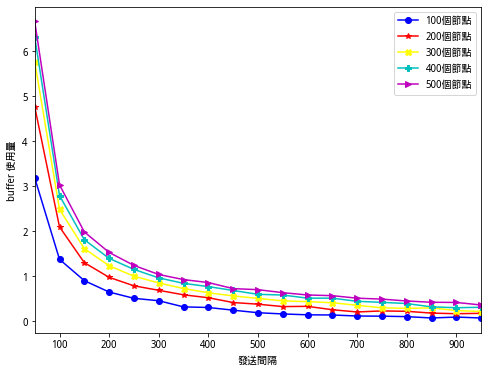

In [13]:
fig, ax = plt.subplots(figsize=(8,6))


for label, d in select2.get_group('append').groupby('nodes'):
    d.plot(x='period',y='c_sensor_buffer_packet_rate', ax=ax, label=f"{label}個節點", color=color_dict[f"{label}"])
plt.legend()

plt.ylabel('buffer 使用量')
plt.xlabel('發送間隔')

In [14]:
fig, ax = plt.subplots(figsize=(8,6))

for label, d in select2.get_group('append').groupby('nodes'):
    d.plot(x='period',y='c_packet_rate', ylim=(0.8, 1),ax=ax, label=f"{label}個節點", color=color_dict[f"{label}"])
plt.legend()

plt.ylabel('封包到達率')
plt.xlabel('發送間隔')

Text(0.5, 0, '發送間隔')

In [15]:
fig, ax = plt.subplots(figsize=(8,6))

for label, d in select2.get_group('append').groupby('nodes'):
    d.plot(x='period',y='avg_packets', ax=ax, label=f"{label}個節點", color=color_dict[f"{label}"])
plt.legend()

plt.ylabel('封包產生量')
plt.xlabel('發送間隔')

Text(0.5, 0, '發送間隔')

In [16]:
# 發送間隔 50 ，節點 12

In [17]:
d12 = {"s12":[{"_t":64.12,"temp":25},{"_t":290.77,"temp":20},{"_t":361.45,"temp":23},{"_t":390.61,"temp":22},{"_t":629.02,"temp":22},{"_t":653.62,"temp":27},{"_t":696.68,"temp":24},{"_t":777.01,"temp":20},{"_t":883.74,"temp":28},{"_t":916.11,"temp":22},{"_t":1013.18,"temp":26},{"_t":1037.91,"temp":22},{"_t":1048.96,"temp":100},{"_t":1063.91,"temp":27},{"_t":1100.76,"temp":27},{"_t":1111.99,"temp":27},{"_t":1162.56,"temp":26,"status":"hit"},{"_t":1239.32,"temp":28,"status":"hit"},{"_t":1341,"temp":29,"status":"hit"},{"_t":1419.81,"temp":23,"status":"hit"},{"_t":1470.93,"temp":26,"status":"hit"},{"_t":1502.23,"temp":28,"status":"hit"},{"_t":1538.01,"temp":20,"status":"hit"},{"_t":1644.05,"temp":28,"status":"hit"},{"_t":1646.54,"temp":27},{"_t":1682.18,"temp":100},{"_t":1820.08,"temp":22},{"_t":1847.01,"temp":26},{"_t":1875.54,"temp":21},{"_t":1911.22,"temp":100},{"_t":1923.17,"temp":29},{"_t":1954.12,"temp":100},{"_t":1976.02,"temp":28,"status":"hit"},{"_t":1999.12,"temp":27,"status":"hit"},{"_t":2005.65,"temp":22,"status":"hit"},{"_t":2006.03,"temp":23,"status":"hit"},{"_t":2073.41,"temp":26,"status":"hit"},{"_t":2094.12,"temp":25,"status":"hit"},{"_t":2155.66,"temp":24,"status":"hit"},{"_t":2223.71,"temp":28,"status":"hit"},{"_t":2245.4,"temp":23},{"_t":2251.63,"temp":22},{"_t":2265.27,"temp":20},{"_t":2270.42,"temp":24},{"_t":2314.13,"temp":24},{"_t":2320.64,"temp":21},{"_t":2411.59,"temp":20},{"_t":2517.98,"temp":23},{"_t":2647.73,"temp":25},{"_t":2669.76,"temp":24},{"_t":2680.69,"temp":22},{"_t":2700.5,"temp":22},{"_t":2768.68,"temp":25},{"_t":2865.63,"temp":22},{"_t":2871.96,"temp":24},{"_t":2882.63,"temp":29},{"_t":2909.03,"temp":21},{"_t":2920.55,"temp":26},{"_t":3011.3,"temp":23},{"_t":3103.24,"temp":22},{"_t":3118.63,"temp":26},{"_t":3120.51,"temp":26},{"_t":3129.42,"temp":24},{"_t":3186.6,"temp":100},{"_t":3202.23,"temp":25},{"_t":3209.23,"temp":24},{"_t":3263.28,"temp":29},{"_t":3296.22,"temp":22},{"_t":3375.66,"temp":26},{"_t":3534.61,"temp":20},{"_t":3579.64,"temp":21}]}

In [18]:
s12 = d12['s12']

In [19]:

fig, ax = plt.subplots(figsize=(8,6))

s12_x = [a['_t'] for a in s12]
s12_y = [a['temp'] for a in s12]

plt.plot(s12_x, s12_y, linestyle=':', marker='')

s12_tx = []
s12_ty = []
for index, a in enumerate(s12):
    if a.get('status') == 'hit' and len(s12_tx) != 0:
        plt.plot(s12_tx, s12_ty, linestyle='-', marker='')
        s12_tx = []
        s12_ty = []

    
    s12_tx.append(a['_t'])
    s12_ty.append(a['temp'])
    
    if a.get('status') != 'hit' and index == len(a) - 1 and len(s12_tx) != 0:
        plt.plot(s12_tx, s12_ty, linestyle='-', marker='')


plt.xlabel('時間')
plt.ylabel('溫度')

Text(0, 0.5, '溫度')

# Aggregate

In [20]:
fig, ax = plt.subplots(figsize=(8,6))

for label, d in select2.get_group('aggregate').groupby('nodes'):
    d.plot(x='period',y='avg_agg_packets', ax=ax, label=label, color=color_dict[f"{label}"])
plt.ylabel('aggregate 次數')
plt.xlabel('發送間隔')
    

Text(0.5, 0, '發送間隔')

In [21]:
fig, ax = plt.subplots(figsize=(8,6))

plt.ylabel('aggregate ')

for label, d in select2.get_group('aggregate').groupby('nodes'):
    d.plot(x='period',y='agg_packets_percent', ax=ax, label=f"{label}個節點", color=color_dict[f"{label}"])
plt.legend()

plt.ylabel('aggregate 比例')
plt.xlabel('發送間隔')

Text(0.5, 0, '發送間隔')

Text(0.5, 0, '發送間隔')

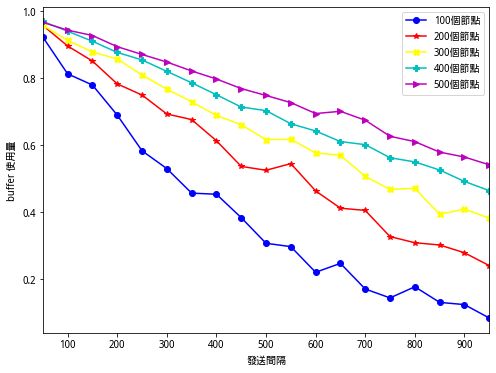

In [22]:
fig, ax = plt.subplots(figsize=(8,6))


for label, d in select2.get_group('aggregate').groupby('nodes'):
    d.plot(x='period',y='c_sensor_buffer_packet_rate', ax=ax, label=f"{label}個節點", color=color_dict[f"{label}"])
plt.legend()

plt.ylabel('buffer 使用量')
plt.xlabel('發送間隔')

Text(0.5, 0, '發送間隔')

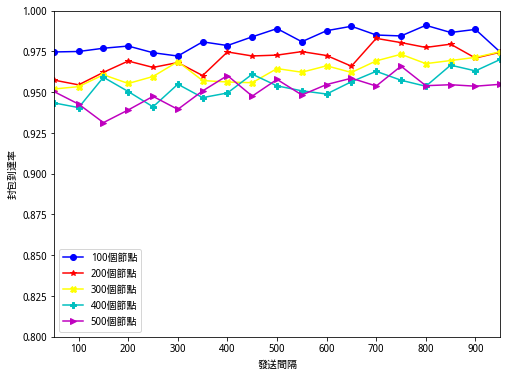

In [23]:
fig, ax = plt.subplots(figsize=(8,6))

for label, d in select2.get_group('aggregate').groupby('nodes'):
    d.plot(x='period',y='c_packet_rate', ylim=(0.8, 1),ax=ax, label=f"{label}個節點", color=color_dict[f"{label}"])
plt.legend()

plt.ylabel('封包到達率')
plt.xlabel('發送間隔')

In [24]:
fig, ax = plt.subplots(figsize=(8,6))

for label, d in select2.get_group('aggregate').groupby('nodes'):
    d.plot(x='period',y='avg_packets', ax=ax, label=f"{label}個節點", color=color_dict[f"{label}"])
plt.legend()

plt.ylabel('封包產生量')
plt.xlabel('發送間隔')

Text(0.5, 0, '發送間隔')

## 編號 90 sensor 的資料

In [25]:
d90 = {"s90": [{"_t": 6.46, "temp": 29}, {"_t": 100.37, "temp": 24}, {"_t": 247.29, "temp": 23}, {"_t": 419.54, "temp": 20}, {"_t": 450.26, "temp": 21}, {"_t": 492.23, "temp": 23}, {"_t": 705.01, "temp": 22}, {"_t": 875.87, "temp": 25}, {"_t": 910.04, "temp": 20}, {"_t": 1004.12, "temp": 26}, {"_t": 1076.49, "temp": 21}, {"_t": 1300.57, "temp": 29}, {"_t": 1406.88, "temp": 21}, {"_t": 1929.5, "temp": 25}, {"_t": 2154.0, "temp": 26}, {"_t": 2395.34, "temp": 21}, {"_t": 2472.73, "temp": 24}, {"_t": 2486.56, "temp": 23}, {"_t": 2529.17, "temp": 21}, {"_t": 2577.72, "temp": 22}, {"_t": 2919.63, "temp": 100}, {"_t": 3284.16, "temp": 100}, {"_t": 3334.98, "temp": 26}, {"_t": 3506.81, "temp": 22}]}

In [26]:
a90 = {"s90": [{"id": 12, "paddingTime": 6.46, "lastUpdateTime": 100.37, "data": {"_temp_w": 2, "_temp_x": 29, "_temp_n": 24, "temp": 26.5}}, {"id": 206, "paddingTime": 247.29, "lastUpdateTime": 2577.72, "data": {"_temp_w": 18, "_temp_x": 29, "_temp_n": 20, "temp": 22.944444444444443}}, {"id": 1121, "paddingTime": 2919.63, "lastUpdateTime": 2919.63, "data": {"_temp_w": 1, "_temp_x": 100, "_temp_n": 100, "temp": 100}}, {"id": 1210, "paddingTime": 3284.16, "lastUpdateTime": 3284.16, "data": {"_temp_w": 1, "_temp_x": 100, "_temp_n": 100, "temp": 100}}, {"id": 1228, "paddingTime": 3334.98, "lastUpdateTime": 3506.81, "data": {"_temp_w": 2, "_temp_x": 26, "_temp_n": 22, "temp": 24.0}}]}

In [27]:
s90 = d90['s90']
g90 = a90['s90']

Text(0, 0.5, '溫度')

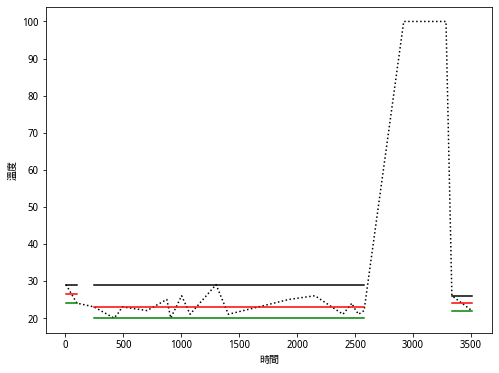

In [28]:

fig, ax = plt.subplots(figsize=(8,6))

s90_x = [a['_t'] for a in s90]
s90_y = [a['temp'] for a in s90]

plt.plot(s90_x, s90_y, linestyle=':', marker='')

for index, a in enumerate(g90):
    g90_x = [a['paddingTime'], a['lastUpdateTime']]
    g90_temp = [a['data']['temp'], a['data']['temp']]
    g90_max = [a['data']['_temp_x'], a['data']['_temp_x']]
    g90_min = [a['data']['_temp_n'], a['data']['_temp_n']]

    plt.plot(g90_x, g90_temp, linestyle='-', marker='', color='r')
    plt.plot(g90_x, g90_max, linestyle='-', marker='', color='k')
    plt.plot(g90_x, g90_min, linestyle='-', marker='', color='green')


plt.xlabel('時間')
plt.ylabel('溫度')